#### 【課題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
%matplotlib inline

x = pd.read_csv("all/train.csv")
#y = pd.read_csv("all/test.csv")

data = x[["GrLivArea", "YearBuilt", "SalePrice"]]
#test_data = y[["GrLivArea", "YearBuilt"]]

#### 【課題2】回帰問題のパイプライン
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れ（パイプライン）を作成・実行してください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation  
評価のための指標値は分類問題と異なり、平均二乗誤差（Mean Squared Error, MSE）を使うことが一般的です。  
sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation  
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。  

##### データを簡単に分析

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB
None
   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000
         GrLivArea    YearBuilt      SalePrice
count  1460.000000  1460.000000    1460.000000
mean   1515.463699  1971.267808  180921.195890
std     525.480383    30.202904   79442.502883
min     334.000000  1872.000000   34900.000000
25%    1129.500000  1954.000000  129975.000000
50%    1464.000000  1973.000000  163000.000000
75%    1776.750000  2000.000000  214000.000000
max    5642.000000  2010.000000  755000.000000


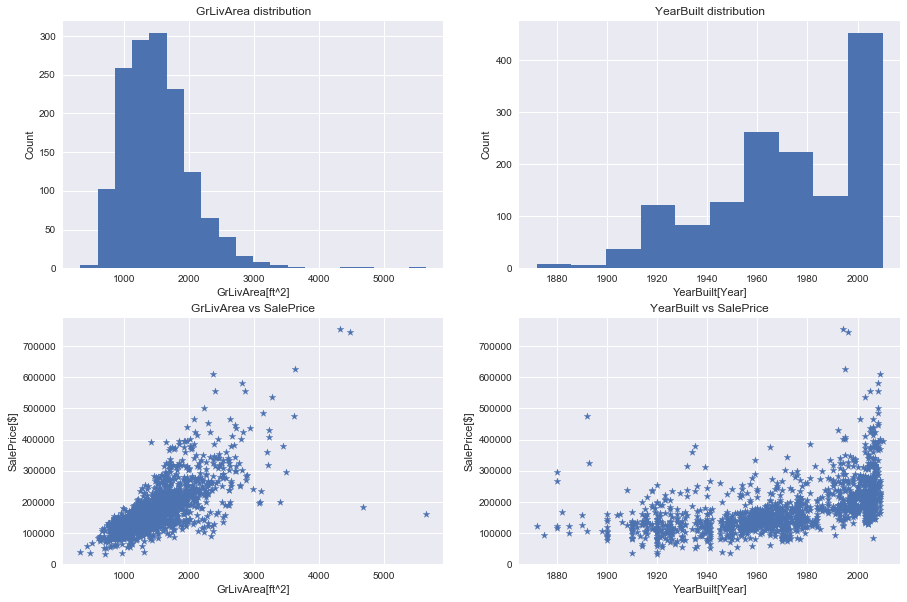

In [2]:
#データの確認
print(data.info())
print(data.head())
print(data.describe())

#散布図("GrLivArea" vs "SalePrice" & "YearBuilt" vs "SalePrice")
#fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0))
ax4 = plt.subplot2grid((2,2), (1,1))

ax1.set_title('GrLivArea distribution')
ax1.set_xlabel('GrLivArea[ft^2]')
ax1.set_ylabel('Count')
ax1.grid(True)

ax2.set_title('YearBuilt distribution')
ax2.set_xlabel('YearBuilt[Year]')
ax2.set_ylabel('Count')
ax2.grid(True)

ax3.set_title('GrLivArea vs SalePrice')
ax3.set_xlabel('GrLivArea[ft^2]')
ax3.set_ylabel('SalePrice[$]')
ax3.grid(True)

ax4.set_title('YearBuilt vs SalePrice')
ax4.set_xlabel('YearBuilt[Year]')
ax4.set_ylabel('SalePrice[$]')
ax4.grid(True)

ax1.hist(data["GrLivArea"].values, bins=20)
ax2.hist(data["YearBuilt"].values, bins=10)
ax3.scatter(data["GrLivArea"].values, data["SalePrice"].values, s=50, marker='*')
ax4.scatter(data["YearBuilt"].values, data["SalePrice"].values, s=50, marker='*')

ヒストグラムより  
GrLivAreaは1515[$ft^2$]を中心に若干右に裾が長い分布となっている。  
YearBuiltは古いほどデータが少なく新しいほど多い。正規分布とは異なる分布の形をしているため標準化は行わない。

散布図より   
GrLivAreaに対してはざっくり右上がりの線形に近い関係がありそうだ。GrLivAreaが広ければ家の価格も高くなる。   
YearBuiltに対しては2000年を境に住宅価格が高い物件が急激に増える。 全体的に新築に近いほど価格が高くなる。

##### 前処理

In [20]:
#train dataを分割してtest dataを作成
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)
print("元データ数：{}　学習データ数：{}　検証データ数：{}".format(len(data), len(train_data), len(test_data)))
train_data = train_data.reset_index()
test_data = test_data.reset_index()

#GrLivAreaに対して標準化を行う。
scaler = StandardScaler()
scaler.fit(train_data[["GrLivArea"]].values)
data_normalized = scaler.transform(train_data[["GrLivArea"]].values)

index = [i for i in range(0, len(data_normalized))]
columns = ["GrLivArea"]
pd_normalized_train_data = pd.DataFrame(data_normalized, index=index, columns=columns, dtype='float')
pd_normalized_train_data["YearBuilt"] = train_data["YearBuilt"]
pd_normalized_train_data["SalePrice"] = train_data["SalePrice"]

#Test dataを標準化
scaler.fit(test_data[["GrLivArea"]].values)
data_normalized = scaler.transform(test_data[["GrLivArea"]].values)

index = [i for i in range(0, len(data_normalized))]
columns = ["GrLivArea"]
pd_normalized_test_data = pd.DataFrame(data_normalized, index=index, columns=columns, dtype='float')
pd_normalized_test_data["YearBuilt"] = test_data["YearBuilt"]
pd_normalized_test_data["SalePrice"] = test_data["SalePrice"]

元データ数：1460　学習データ数：1095　検証データ数：365


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


##### 線形回帰 による学習、推定、評価、可視化

In [93]:
def pipline(regr):
    regr.fit(pd_normalized_train_data[['GrLivArea']].values,
            pd_normalized_train_data[['SalePrice']].values)
    result_logistic_for_GrLivArea = regr.predict(pd_normalized_test_data[['GrLivArea']].values)
    tmp = mean_squared_error(pd_normalized_test_data['SalePrice'].values, result_logistic_for_GrLivArea)
    print("mean squre error(for GrLivArea)={}".format(np.sqrt(tmp)))
    
    regr.fit(pd_normalized_train_data[['YearBuilt']].values,
            pd_normalized_train_data[['SalePrice']].values)
    result_logistic_for_YearBuilt = regr.predict(pd_normalized_test_data[['YearBuilt']].values)
    tmp = mean_squared_error(pd_normalized_test_data['SalePrice'].values, result_logistic_for_YearBuilt)
    print("mean squre error(YearBuilt)={}".format(np.sqrt(tmp)))
    
    fig = plt.figure(figsize=(15,5))
    ax1 = plt.subplot2grid((1,2), (0,0))
    ax2 = plt.subplot2grid((1,2), (0,1))
    ax1.set_title('GrLivArea vs SalePrice(Predict)')
    ax1.set_xlabel('GrLivArea[ft^2](Normalized)')
    ax1.set_ylabel('SalePrice[$]')
    ax1.grid(True)
    ax1.scatter(pd_normalized_test_data[['GrLivArea']].values, result_logistic_for_GrLivArea, s=50, color="Red", marker='*', label="predicted")
    ax1.scatter(pd_normalized_train_data[['GrLivArea']].values, pd_normalized_train_data[['SalePrice']].values, s=5, color="gray", marker='+', label="train data")
    ax1.scatter(pd_normalized_test_data[['GrLivArea']].values, pd_normalized_test_data[['SalePrice']].values, s=50, color="Blue", marker='*', label="test data")
    ax1.legend(fontsize=15)
    
    ax2.set_title('YearBuilt vs SalePrice(Predict)')
    ax2.set_xlabel('YearBuilt[year]')
    ax2.set_ylabel('SalePrice[$]')
    ax2.grid(True)
    ax2.scatter(pd_normalized_test_data[['YearBuilt']].values, result_logistic_for_YearBuilt, s=50, color="Red", marker='*', label="predicted")
    ax2.scatter(pd_normalized_train_data[['YearBuilt']].values, pd_normalized_train_data[['SalePrice']].values, s=5, color="gray", marker='+', label="train data")
    ax2.scatter(pd_normalized_test_data[['YearBuilt']].values, pd_normalized_test_data[['SalePrice']].values, s=50, color="Blue", marker='*', label="test data")
    ax2.legend(fontsize=15)

mean squre error(for GrLivArea)=55664.85382493243
mean squre error(YearBuilt)=70976.17437935121


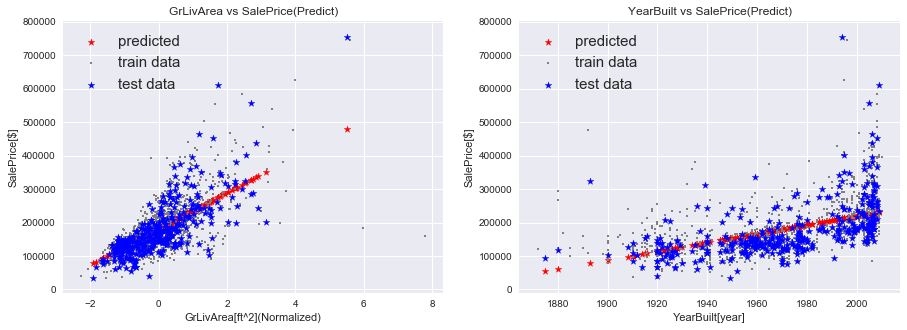

In [94]:
liner_regr = LinearRegression()
pipline(liner_regr)

#### 【課題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。  
線形回帰  
SVM  
決定木  
ランダムフォレスト  
公式ドキュメントへのリンクは以下です。本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。  
sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation  
sklearn.svm.SVR — scikit-learn 0.20.2 documentation  
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.20.2 documentation  
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.2 documentation  
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。  

##### SVM による学習、推定、評価、可視化

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squre error(for GrLivArea)=84683.83281700719
mean squre error(YearBuilt)=84723.28253560215


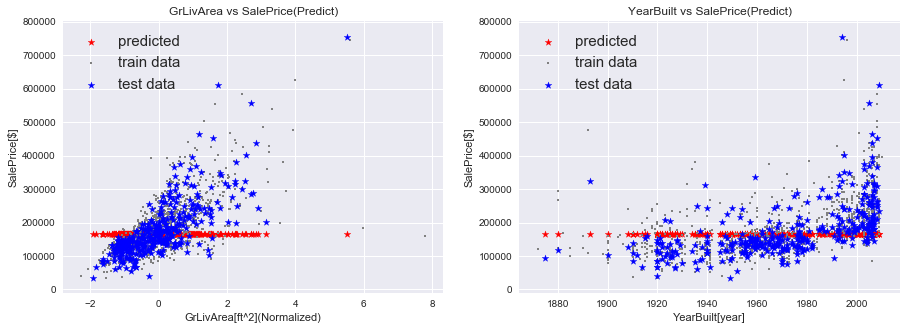

In [95]:
from sklearn.svm import SVR
svm_regr = SVR(gamma='scale', C=1.0, epsilon=0.2)
pipline(svm_regr)

##### 決定木による学習、推定、評価、可視化

mean squre error(for GrLivArea)=73998.3171725227
mean squre error(YearBuilt)=69144.48937973398


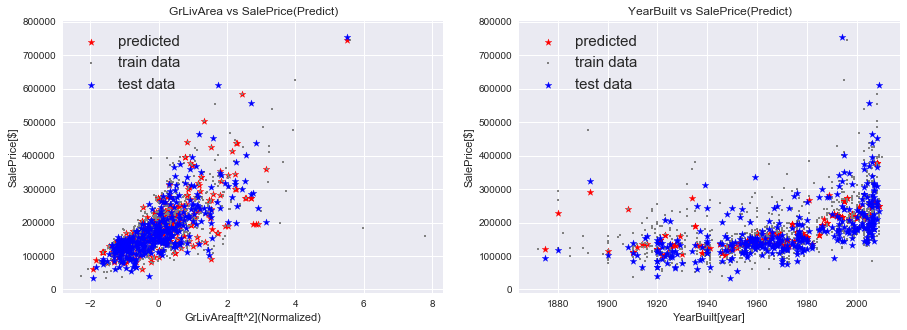

In [96]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(random_state=0)
pipline(dt_regr)

##### ランダムフォレストによる学習、推定、評価、可視化

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


mean squre error(for GrLivArea)=58539.034427160026
mean squre error(YearBuilt)=66415.66012423557


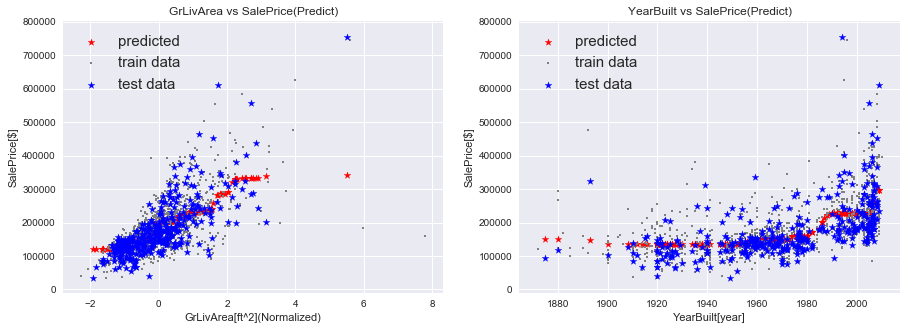

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
pipline(rf_regr)

#### 結果まとめ

各手法の予測結果と実際の答えの比較図を見ると、決定木による予測が最も答えに近いように見えるが、
平均二乗誤差による評価の結果、特徴量"GrLivArea"に対しては線形回帰、特徴量"YearBuilt"に対してはランダムフォレストが最も良い結果であった。

GrLivArea  
平均二乗誤差は線形回帰が最も小さかった。

| 学習方法 | 平均二乗誤差 |
|:-----------:|:------------:|
| 線形回帰 | 55664 |
| SVM | 84683 |
| 決定木 | 73998 |
| ランダムフォレスト | 58539 |


YearBuilt  
平均二乗誤差はランダムフォレストが最も小さかった。

| 学習方法 | 平均二乗誤差 |
|:-----------:|:------------:|
| 線形回帰 | 70976 |
| SVM | 84723 |
| 決定木 | 69144 |
| ランダムフォレスト | 66415 |

#### 【問題4】（アドバンス課題）各パラメータの意味
手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではありません。それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。

#### 【問題5】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。